In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [5]:
from torchvision import datasets,transforms
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])
trainset=datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
print(trainset)

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: MNIST_data/
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None


In [0]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


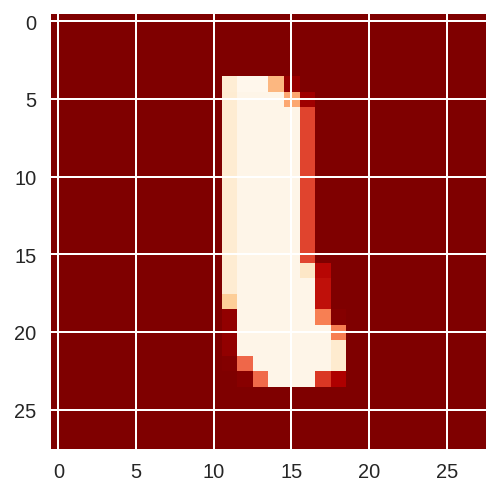

In [0]:
plt.imshow(images[1].numpy().squeeze(),cmap='OrRd_r');
#we can use color like Grey_r,Blues_r ,OrRd_r etc

In [0]:
x=torch.Tensor
def activation(x):
  return (1/(1+torch.exp(-x)))

In [0]:

feature=images.view(images.shape[0],-1)#matrix of 1*3
n_input=784
n_hidden=256 #hidden layer
n_output=10 #output layer
w1=torch.randn(n_input,n_hidden) #random weight generation from [input * hidden layer ] size matrix
w2=torch.randn(n_hidden,n_output) #random second weight generation[hidden *output layer] size matrix
b1=torch.randn((1,n_hidden)) #randoom bias generation from [single layer of column of hidden size]matrix
b2=torch.randn((1,n_output)) #random bias generation from [single layer of column of output size]matrix
print(w1,w2,b1,b2)


tensor([[ 0.5476, -1.5308, -2.8354,  ...,  1.5563, -0.4891,  1.6273],
        [-0.9701,  0.4091,  0.6091,  ..., -0.9240, -1.7153,  0.2685],
        [-2.0435, -1.6081,  0.3788,  ...,  0.4590,  1.7675, -0.0356],
        ...,
        [-0.5367,  0.6539, -0.1330,  ...,  0.5280,  0.0046, -2.1517],
        [-0.2589, -0.3300, -1.4092,  ..., -0.1058, -0.0897, -0.2233],
        [-0.0695,  0.3180, -0.0127,  ..., -0.2423,  0.5044, -0.6737]]) tensor([[ 0.8658,  0.1515,  0.1625,  ..., -0.8938,  0.4326,  0.2690],
        [ 0.2420, -0.1392, -0.4264,  ...,  0.8634,  1.8002,  0.2004],
        [ 0.5616, -0.0788, -0.4424,  ..., -0.0884,  0.2705,  0.2633],
        ...,
        [-2.9063,  0.4136,  0.3486,  ..., -0.0614,  0.3996,  1.0429],
        [-1.2413,  1.0225,  0.9536,  ...,  0.6259,  0.8967, -1.0685],
        [ 2.0095,  1.0825,  0.7260,  ...,  1.6356, -0.4445, -1.1232]]) tensor([[-0.5299,  0.2446,  0.7416, -0.4884, -0.5553,  0.1098,  1.4974, -0.3364,
         -1.8621, -0.7271,  0.4185, -0.6416, -0.377

In [0]:
#solution
h=activation(torch.matmul(feature,w1)+b1) 
output=activation(torch.matmul(h,w2)+b2)
print(output)

tensor([[1.0000e+00, 1.0000e+00, 9.9997e-01, 1.0000e+00, 4.6151e-03, 2.1732e-01,
         8.5237e-08, 5.9445e-02, 1.0000e+00, 6.2730e-06],
        [1.0000e+00, 1.0000e+00, 9.9883e-01, 1.0000e+00, 3.5621e-03, 9.9993e-01,
         7.9466e-08, 2.6204e-02, 1.0000e+00, 1.4008e-02],
        [1.0000e+00, 9.9998e-01, 9.9821e-01, 1.0000e+00, 1.1647e-03, 8.5160e-01,
         8.8641e-08, 1.7442e-03, 1.0000e+00, 2.2733e-02],
        [1.0000e+00, 9.9998e-01, 9.9959e-01, 9.9995e-01, 5.9618e-01, 9.2485e-01,
         5.5882e-08, 3.2925e-05, 1.0000e+00, 2.5311e-01],
        [1.0000e+00, 9.9998e-01, 1.3810e-01, 1.0000e+00, 3.6887e-06, 7.3496e-02,
         8.1951e-09, 8.9922e-01, 9.9987e-01, 7.4600e-02],
        [1.0000e+00, 1.0000e+00, 1.9035e-03, 9.9986e-01, 4.9289e-06, 8.3317e-01,
         4.3879e-06, 5.1018e-01, 1.0000e+00, 4.7280e-01],
        [9.9999e-01, 7.9788e-01, 7.4763e-01, 9.9978e-01, 6.8646e-02, 5.0084e-01,
         3.3231e-04, 2.5859e-06, 1.0000e+00, 3.3438e-04],
        [1.0000e+00, 1.0000

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    #input to hiden layers
    self.hidden=nn.Linear(784,256)
    #input to ooutput layers
    self.output=nn.Linear(256,10)
    self.sigmoid=nn.Sigmoid()
    self.softmax=nn.Softmax(dim=1)
  def forward(self,x):
    x=self.hidden(x)
    x=self.output(x)
    x=self.sigmoid(x)
    x=self.softmax(x)
    retun(x)

In [0]:
import torch.nn.functional as F
from torch import optim

In [0]:
class Network1(nn.Module):
  def __init__(self):
    super().__init()
    #input to hidden layers
    self.hidden=nn.Linear(784,256)
    #inpput to output layers
    self.output=nn.Linear(256,10)
  def forward(self,x):
    x=F.Sigmoid(self.hidden)
    x=F.Softmax(sel.output)
    return x

In [0]:
model=nn.Sequential(nn.Linear(784,128),nn.ReLU(),nn.Linear(128,64),nn.ReLU(),nn.Linear(64,10),nn.ReLU(),nn.LogSoftmax(dim=1))
criterion=nn.NLLLoss()
optimizer=optim.SGD(model.parameters(),lr=0.005)#traning data
epochs=7
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    images=images.view(images.shape[0],-1)
    optimizer.zero_grad()
    output=model.forward(images)
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
    print({running_loss/len(trainloader)})

{1.9394331608753976}
{1.0034868556108556}
{0.8150502824897705}
{0.7642643095206604}
{0.7399665117899238}
{0.6605403704493285}
{0.5635962505965854}


In [0]:
#used to import from colab
from google.colab import files
files.upload()
# choose the file on your computer to upload it then
import helper

In [0]:
import helper


In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()


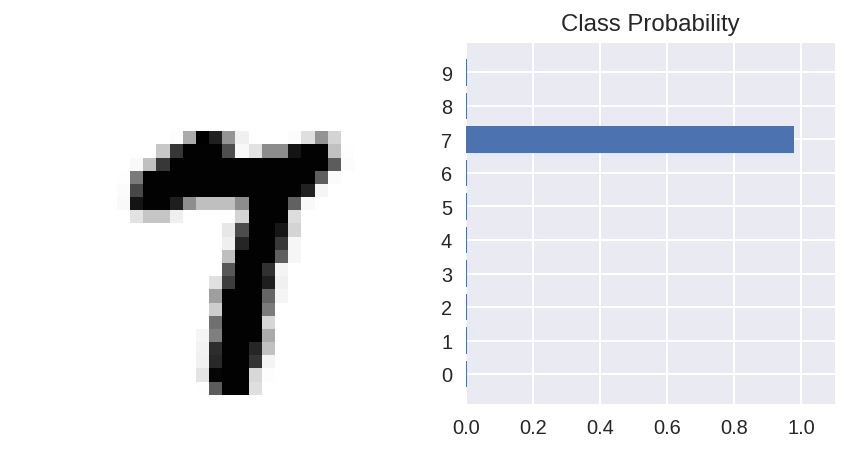

In [0]:
%matplotlib inline
images,labels=next(iter(trainloader))
img=images[0].view(1,784)
with torch.no_grad():
  logits=model.forward(img)
ps=F.softmax(logits,dim=1)
view_classify(img.view(1,28,28),ps)